 <h2><b>Get Dataset From Kaggle</h2>

In [ ]:
import os # paths to file
os.environ['KAGGLE_USERNAME'] = "pratibhabalgi"
os.environ['KAGGLE_KEY'] = "5653a67e9f7e4d92b1a3c6f2d689ba6f"

In [ ]:
!kaggle datasets download benroshan/online-food-delivery-preferencesbangalore-region --force # to get dataset from kaggle

Dataset URL: https://www.kaggle.com/datasets/benroshan/online-food-delivery-preferencesbangalore-region
License(s): CC0-1.0
  0% 0.00/24.0k [00:00<?, ?B/s]
100% 24.0k/24.0k [00:00<00:00, 9.37MB/s]


In [ ]:
!unzip online-food-delivery-preferencesbangalore-region #unzip

Archive:  online-food-delivery-preferencesbangalore-region.zip
replace onlinedeliverydata.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


 <h2><b>Importing Important Libraries📚</h2>

In [ ]:
import pandas as pd # data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt # used for creating visualizations like graphs and charts
import seaborn as sns # visualization library

In [ ]:
from scipy import stats  # For Z-score calculation

In [ ]:
import tensorflow as tf  # TensorFlow for deep learning

# Scikit-learn for splitting data and encoding labels
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score  # For evaluation metrics
from sklearn.linear_model import LogisticRegression  # Logistic Regression model


# TensorFlow Keras model and layers
from tensorflow.keras.models import Sequential  # Sequential model
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout, SpatialDropout1D, Bidirectional  # Various layers

# Regularization
from tensorflow.keras import regularizers  # For L2 regularization

# Tokenizer and sequence padding for text processing
from tensorflow.keras.preprocessing.text import Tokenizer  # To tokenize text
from tensorflow.keras.preprocessing.sequence import pad_sequences  # To pad sequences for uniform input length


<h2><b>Data Preprocessing: 🧹 Cleaning & Preparing the Data</h2>

In [ ]:
data = pd.read_csv('onlinedeliverydata.csv') #read the csv file

In [ ]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 Age                                          0
Gender                                       0
Marital Status                               0
Occupation                                   0
Monthly Income                               0
Educational Qualifications                   0
Family size                                  0
latitude                                     0
longitude                                    0
Pin code                                     0
Medium (P1)                                  0
Medium (P2)                                  0
Meal(P1)                                     0
Meal(P2)                                     0
Perference(P1)                               0
Perference(P2)                               0
Ease and convenient                          0
Time saving                                  0
More restaurant choices                      0
Easy Payment option                          0
More Offers and Discount                   

In [ ]:
 #Fill missing value
data['Reviews'] = data['Reviews'].fillna('Nil')

In [ ]:
# Handle Outliers
z_scores = np.abs(stats.zscore(data[['Age', 'Family size']]))
data = data[(z_scores < 3).all(axis=1)]
print(f"Shape after removing outliers: {data.shape}")

Shape after removing outliers: (388, 55)


In [ ]:
# Encode Categorical Data
encoder = LabelEncoder()
categorical_cols = ['Gender', 'Marital Status', 'Occupation', 'Output']
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

In [ ]:
print(data.head()) # display first 5 rows

   Age  Gender  Marital Status  Occupation  Monthly Income  \
0   20       0               2           3       No Income   
1   24       0               2           3  Below Rs.10000   
2   22       1               2           3  Below Rs.10000   
3   22       0               2           3       No Income   
4   22       1               2           3  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  ...  \
0              Post Graduate            4   12.9766    77.5993    560001  ...   
1                   Graduate            3   12.9770    77.5773    560009  ...   
2              Post Graduate            3   12.9551    77.6593    560017  ...   
3                   Graduate            6   12.9473    77.5616    560019  ...   
4              Post Graduate            4   12.9850    77.5533    560010  ...   

     Less Delivery time High Quality of package       Number of calls  \
0  Moderately Important    Moderately Important  Moderately Importa

In [ ]:
# To work with Monthly Income column
# Define a mapping for income ranges to numerical values
income_mapping = {
    'No Income': 0,
    'Below Rs.10000': 5000,
    '10001 to 25000': 17500,
    '25001 to 50000': 37500,
    'More than 50000': 50000
}

# Ensure the 'Monthly Income' column is of type string
data['Monthly Income'] = data['Monthly Income'].astype(str)

# Apply the mapping to the 'Monthly Income' column
data['Monthly Income'] = data['Monthly Income'].replace(income_mapping)

# Check for any unmapped values (in case of typos or unexpected values)
print(data['Monthly Income'].isna().sum())  # To see if any NaNs are left

0


<ipython-input-13-634fc36d4474>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Monthly Income'] = data['Monthly Income'].replace(income_mapping)


<h2><b>Exploratory Data Analysis (EDA): 📊 Visualizing and Analyzing the Data<h2>

In [ ]:
# Basic statistics of the dataset
print(data.describe())

              Age      Gender  Marital Status  Occupation  Monthly Income  \
count  388.000000  388.000000      388.000000  388.000000      388.000000   
mean    24.628866    0.572165        1.412371    1.902062    17010.309278   
std      2.975593    0.495404        0.895035    1.329722    19959.225799   
min     18.000000    0.000000        0.000000    0.000000        0.000000   
25%     23.000000    0.000000        0.000000    0.000000        0.000000   
50%     24.000000    1.000000        2.000000    3.000000     5000.000000   
75%     26.000000    1.000000        2.000000    3.000000    37500.000000   
max     33.000000    1.000000        2.000000    3.000000    50000.000000   

       Family size    latitude   longitude       Pin code      Output  
count   388.000000  388.000000  388.000000     388.000000  388.000000  
mean      3.280928   12.972058   77.600160  560040.113402    0.775773  
std       1.351025    0.044489    0.051354      31.399609    0.417611  
min       1.000000

**⭕ Based On Demography Of Customers**

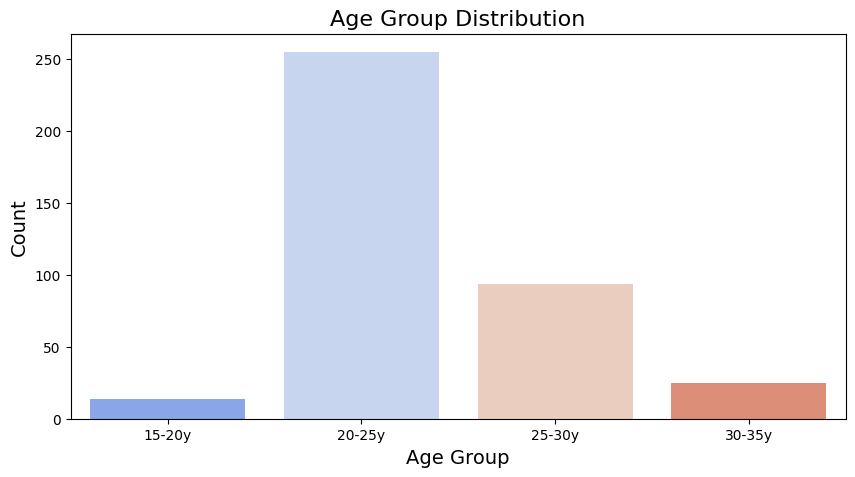

In [ ]:
# Distribution of Age
data['Age_group'] = pd.cut(data['Age'],bins = [15,20,25,30,35], labels = ['15-20y','20-25y','25-30y','30-35y'])

# Plot bar plot for age group distribution
plt.figure(figsize=(10, 5))
sns.countplot(hue='Age_group', x='Age_group', data=data, palette='coolwarm', legend=False)

plt.title('Age Group Distribution', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

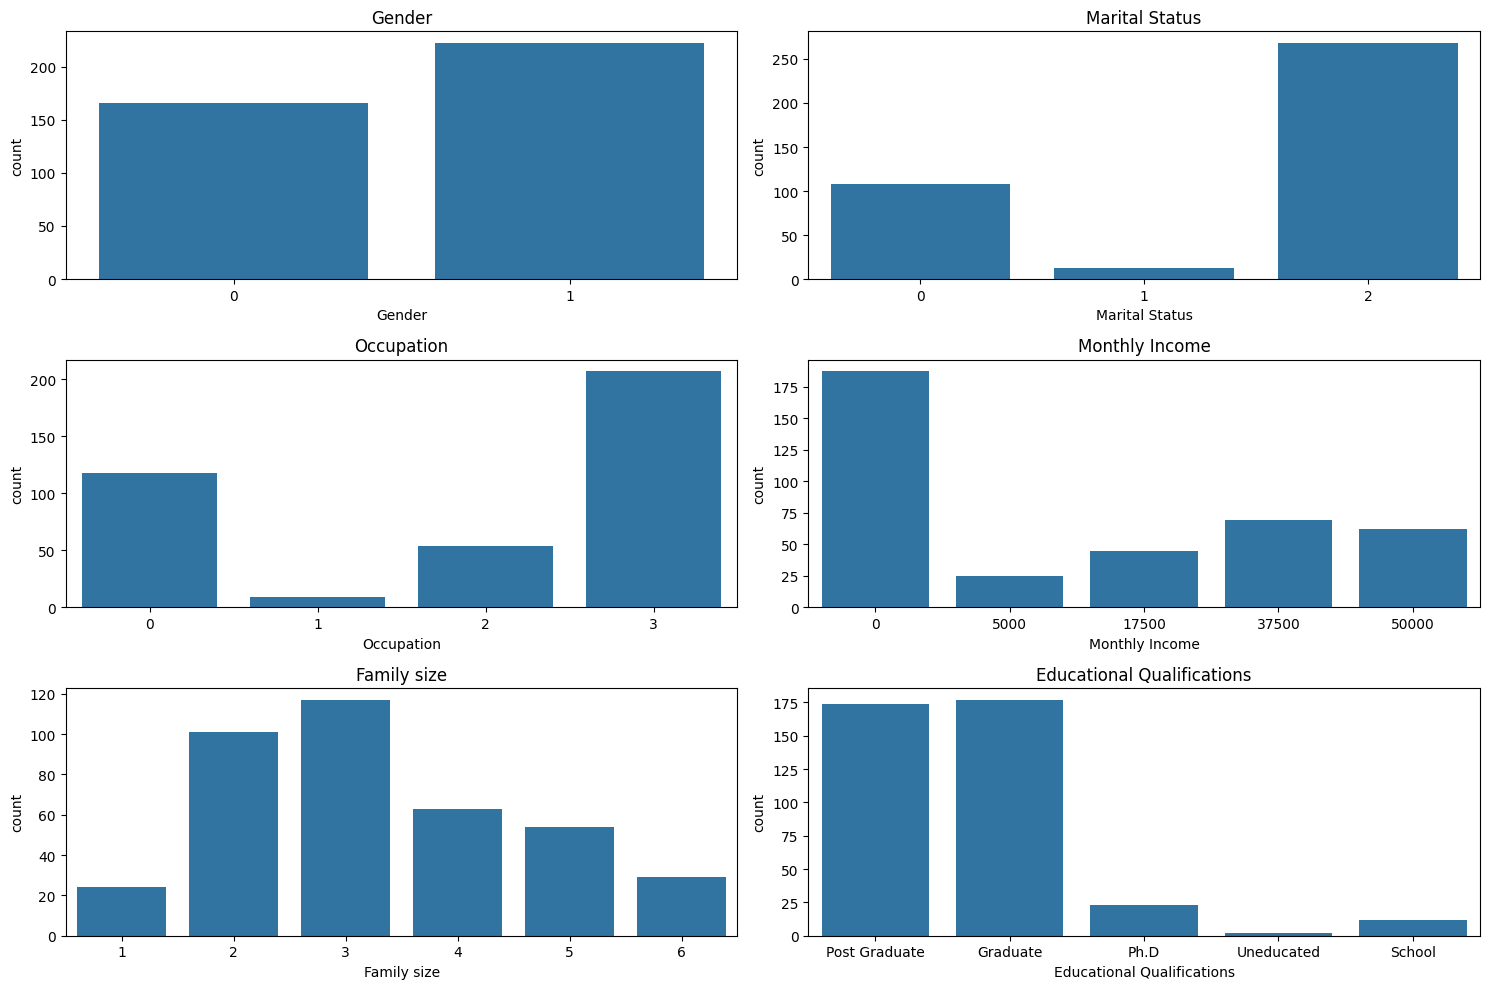

In [ ]:
# Set the figure size
plt.figure(figsize=(15,10))

# Plot 1: Gender distribution
plt.subplot(3,2,1)
sns.countplot(data=data,x='Gender')
plt.title('Gender')

# Plot 2: Marital Status distribution
plt.subplot(3,2,2)
sns.countplot(data=data,x='Marital Status')
plt.title('Marital Status')

# Plot 3: Occupation distribution
plt.subplot(3,2,3)
sns.countplot(data=data,x='Occupation')
plt.title('Occupation')

# Plot 4: Monthly Income distribution
plt.subplot(3,2,4)
sns.countplot(data=data,x='Monthly Income')
plt.title('Monthly Income')

# Plot 5: Family size distribution
plt.subplot(3,2,5)
sns.countplot(data=data,x='Family size')
plt.title('Family size')

# Plot 6: Educational Qualifications distribution
plt.subplot(3,2,6)
sns.countplot(data=data,x='Educational Qualifications')
plt.title('Educational Qualifications')

plt.tight_layout()
plt.show()

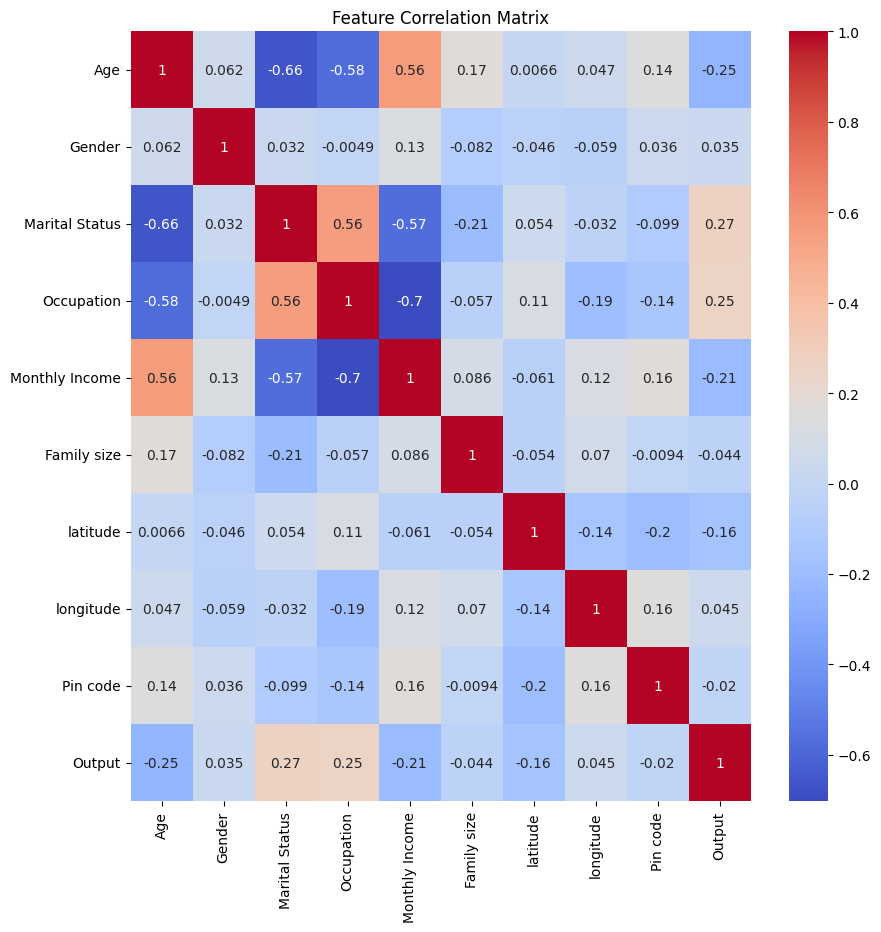

In [ ]:
# Visualize correlations
plt.figure(figsize=(10, 10))

# Select only numerical features for correlation calculation
numerical_features = data.select_dtypes(include=np.number)
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

**⭕ Features that influence users to use online food delivery**

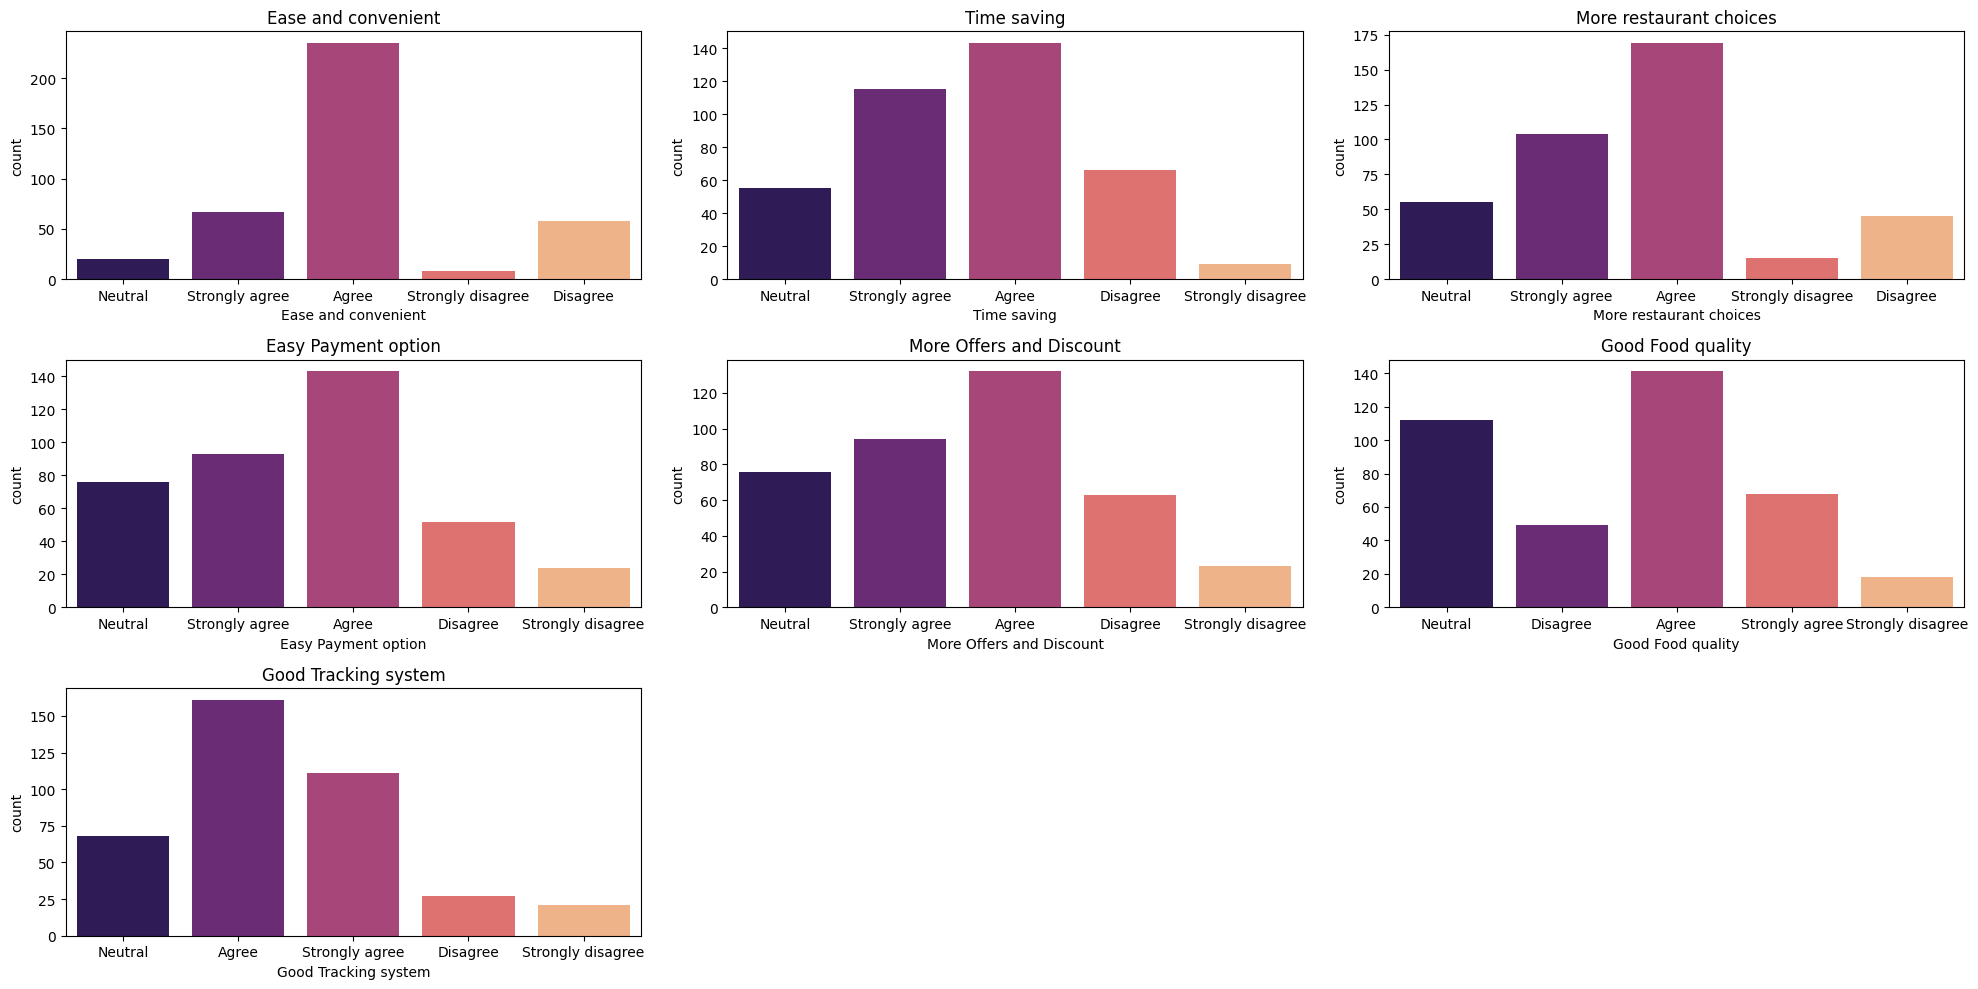

In [ ]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Plot 1: Ease and convenient
plt.subplot(3, 3, 1)
sns.countplot(data=data, x='Ease and convenient', hue='Ease and convenient', palette='magma', legend=False)
plt.title('Ease and convenient')

# Plot 2: Time saving
plt.subplot(3, 3, 2)
sns.countplot(data=data, x='Time saving', hue='Time saving', palette='magma', legend=False)
plt.title('Time saving')

# Plot 3: More restaurant choices
plt.subplot(3, 3, 3)
sns.countplot(data=data, x='More restaurant choices', hue='More restaurant choices', palette='magma', legend=False)
plt.title('More restaurant choices')

# Plot 4: Easy Payment option
plt.subplot(3, 3, 4)
sns.countplot(data=data, x='Easy Payment option', hue='Easy Payment option', palette='magma', legend=False)
plt.title('Easy Payment option')

# Plot 5: More Offers and Discount
plt.subplot(3, 3, 5)
sns.countplot(data=data, x='More Offers and Discount', hue='More Offers and Discount', palette='magma', legend=False)
plt.title('More Offers and Discount')

# Plot 6: Good Food quality
plt.subplot(3, 3, 6)
sns.countplot(data=data, x='Good Food quality', hue='Good Food quality', palette='magma', legend=False)
plt.title('Good Food quality')

# Plot 7: Good Tracking system
plt.subplot(3, 3, 7)
sns.countplot(data=data, x='Good Tracking system', hue='Good Tracking system', palette='magma', legend=False)
plt.title('Good Tracking system')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


⭕ **Features that discourage users from using online food delivery**

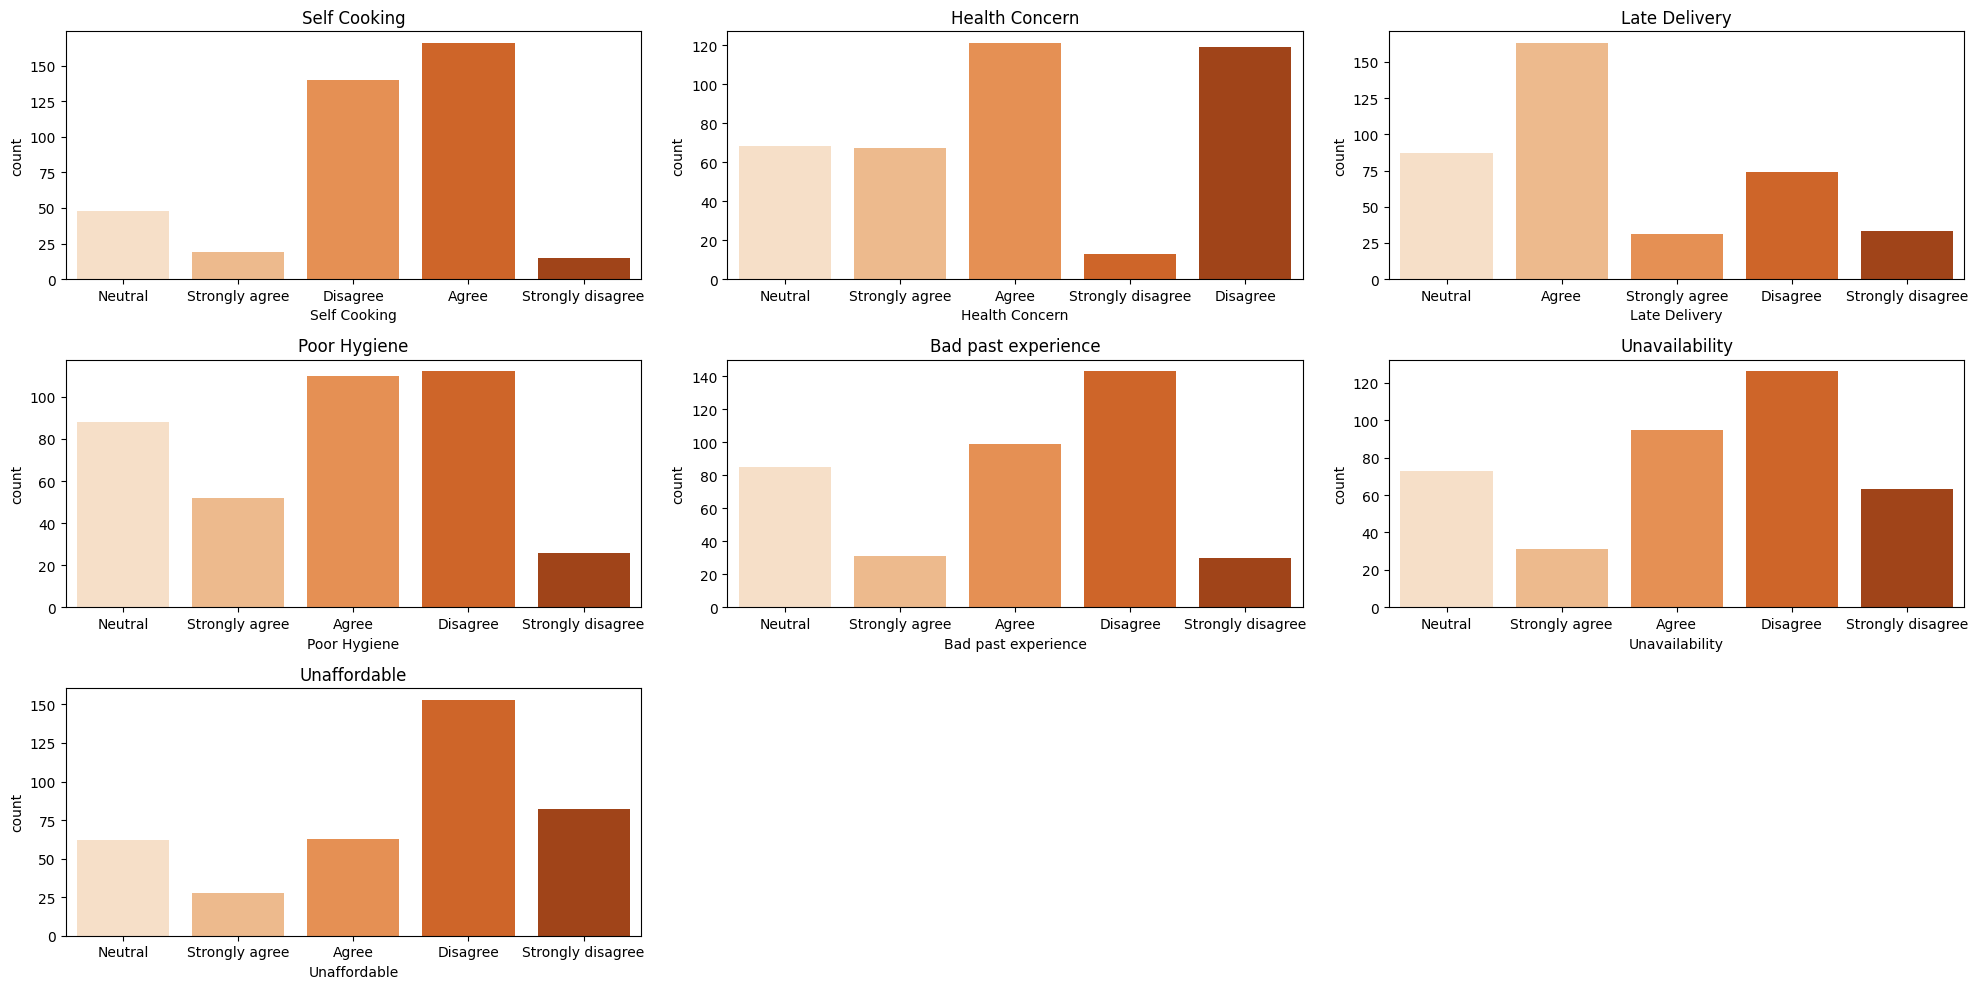

In [ ]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Plot 1: Self Cooking
plt.subplot(3, 3, 1)
sns.countplot(data=data, x='Self Cooking', hue='Self Cooking', palette='Oranges', legend=False)
plt.title('Self Cooking')

# Plot 2: Health Concern
plt.subplot(3, 3, 2)
sns.countplot(data=data, x='Health Concern', hue='Health Concern', palette='Oranges', legend=False)
plt.title('Health Concern')

# Plot 3: Late Delivery
plt.subplot(3, 3, 3)
sns.countplot(data=data, x='Late Delivery', hue='Late Delivery', palette='Oranges', legend=False)
plt.title('Late Delivery')

# Plot 4: Poor Hygiene
plt.subplot(3, 3, 4)
sns.countplot(data=data, x='Poor Hygiene', hue='Poor Hygiene', palette='Oranges', legend=False)
plt.title('Poor Hygiene')

# Plot 5: Bad Past Experience
plt.subplot(3, 3, 5)
sns.countplot(data=data, x='Bad past experience', hue='Bad past experience', palette='Oranges', legend=False)
plt.title('Bad past experience')

# Plot 6: Unavailability
plt.subplot(3, 3, 6)
sns.countplot(data=data, x='Unavailability', hue='Unavailability', palette='Oranges', legend=False)
plt.title('Unavailability')

# Plot 7: Unaffordable
plt.subplot(3, 3, 7)
sns.countplot(data=data, x='Unaffordable', hue='Unaffordable', palette='Oranges', legend=False)
plt.title('Unaffordable')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


⭕ **Time Factor**

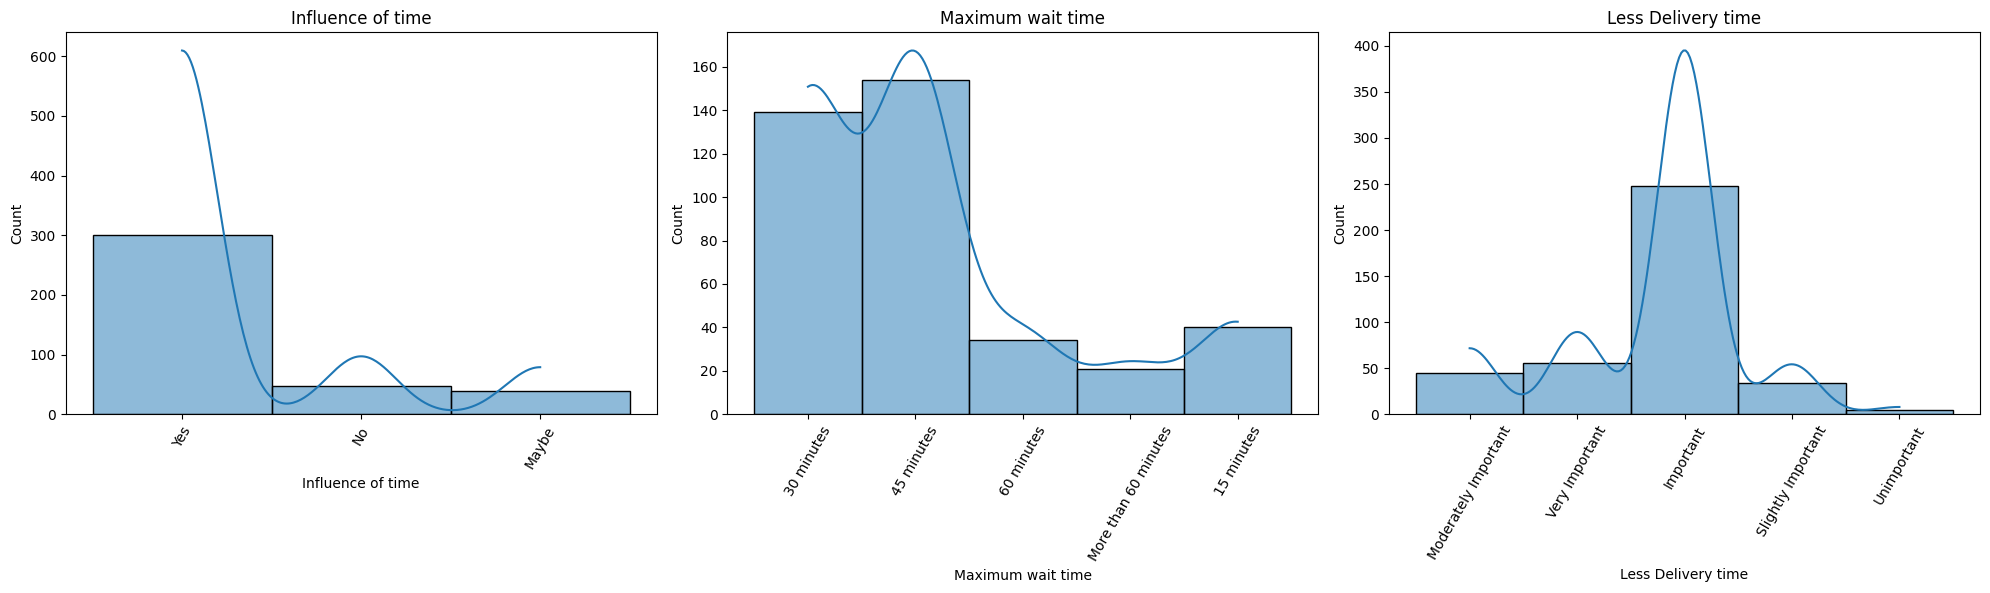

In [ ]:
# Set the figure size
plt.figure(figsize=(20,10))

# Plot 1: Distribution of 'Influence of time'
plt.subplot(2,3,1)
sns.histplot(data['Influence of time'], bins=30, kde=True)
plt.title('Influence of time')
plt.xticks(rotation=60)

# Plot 2: Distribution of 'Maximum wait time'
plt.subplot(2,3,2)
sns.histplot(data['Maximum wait time'], bins=30, kde=True)
plt.title('Maximum wait time')
plt.xticks(rotation=60)

# Plot 3: Distribution of 'Less Delivery time'
plt.subplot(2,3,3)
sns.histplot(data['Less Delivery time'], bins=30, kde=True)
plt.title('Less Delivery time')
plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

<h2><b>Training And Testing Models 🤖</h2>

<h3><b>Problem 1 : Predict User Behavior</h3>

*   Model 1: Convolutional Neural Networks (CNN)

*   Model 2: Recurrent Neural Networks (RNN)
*   Model 3: RNN+LSTM Hybrid Model

In [ ]:
# Define features and target
X = data[['Age', 'Family size', 'Monthly Income', 'Occupation']]
y = data['Output']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Model 1: Convolutional Neural Networks (CNN)**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6526 - loss: 0.6567 - val_accuracy: 0.8462 - val_loss: 0.5009
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7430 - loss: 0.5632 - val_accuracy: 0.8462 - val_loss: 0.4108
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7755 - loss: 0.5158 - val_accuracy: 0.8462 - val_loss: 0.3987
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7514 - loss: 0.5168 - val_accuracy: 0.8462 - val_loss: 0.3985
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7422 - loss: 0.5333 - val_accuracy: 0.8462 - val_loss: 0.3916
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7731 - loss: 0.5095 - val_accuracy: 0.8462 - val_loss: 0.3846
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7387 - loss: 0.5478 - val_accuracy: 0.8462 - val_loss: 0.3798
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7973 - loss: 0.4611 - val_accuracy: 0.8462 - val_loss

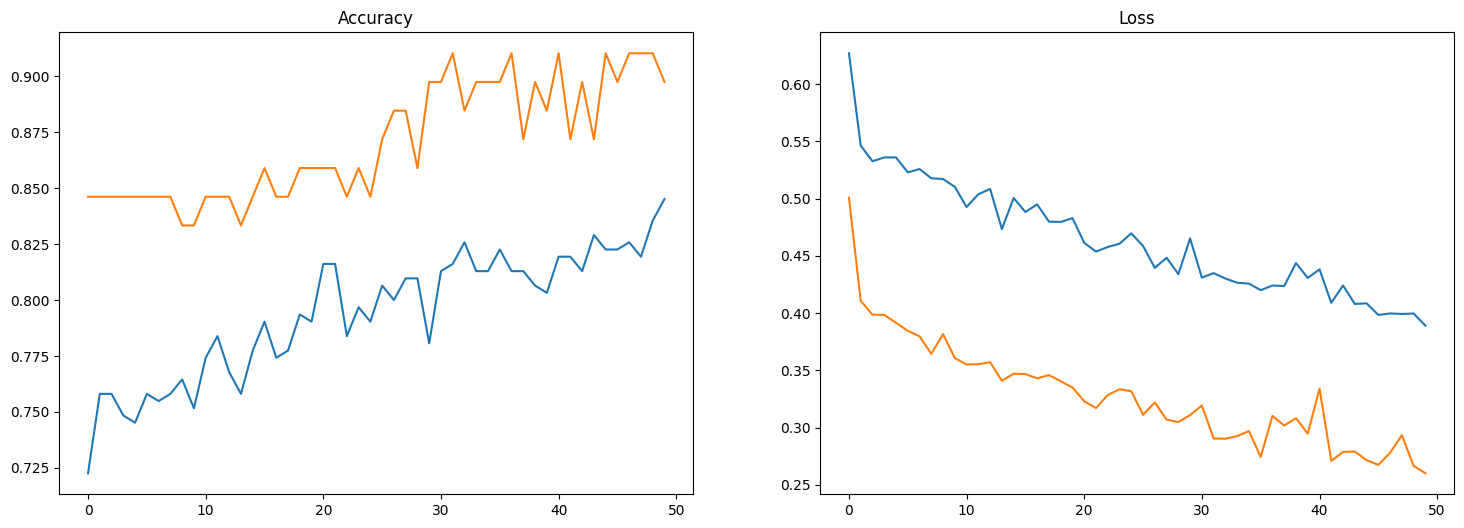


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.42      0.56        12
           1       0.90      0.98      0.94        66

    accuracy                           0.90        78
   macro avg       0.87      0.70      0.75        78
weighted avg       0.89      0.90      0.88        78



In [ ]:
# Define a CNN model
model_cnn = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Increased dropout rate
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape data for CNN input
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Train the model
history_cnn = model_cnn.fit(X_train_cnn, y_train, epochs=50, validation_data=(X_test_cnn, y_test), batch_size=16)

# Evaluate the model
loss, accuracy_cnn = model_cnn.evaluate(X_test_cnn, y_test)
print(f'CNN Accuracy: {accuracy_cnn*100:.2f}%')

# Predict on test data
y_pred = (model_cnn.predict(X_test) > 0.5).astype("int32")  # Threshold at 0.5

# Accuracy and Loss curves
result=pd.DataFrame(history_cnn.history)
fig, ax=plt.subplots(nrows=1, ncols=2,figsize=(18,6))
ax=ax.flatten()
ax[0].plot(result[['accuracy','val_accuracy']])
ax[0].set_title("Accuracy")
ax[1].plot(result[['loss','val_loss']])
ax[1].set_title("Loss")

plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# Display sample predictions
print("First 5 Predictions:", y_pred[:5].flatten())
print("First 5 Actual Values:", y_test[:5].values)

First 5 Predictions: [1 1 1 1 0]
First 5 Actual Values: [0 1 1 1 0]


**Model 2: Recurrent Neural Networks (RNN)**

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.7256 - loss: 0.6209 - val_accuracy: 0.8462 - val_loss: 0.3693
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7593 - loss: 0.5072 - val_accuracy: 0.8462 - val_loss: 0.3711
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7802 - loss: 0.4625 - val_accuracy: 0.8462 - val_loss: 0.3458
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7866 - loss: 0.4435 - val_accuracy: 0.8846 - val_loss: 0.3450
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8001 - loss: 0.4527 - val_accuracy: 0.8846 - val_loss: 0.3199
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7869 - loss: 0.4457 - val_accuracy: 0.8846 - val_loss: 0.3026
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8154 - loss: 0.4319 - val_accuracy: 0.8718 - val_loss: 0.3366
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8092 - loss: 0.4390 - val_accuracy: 0.8846 - val_loss: 0.2973
Ep

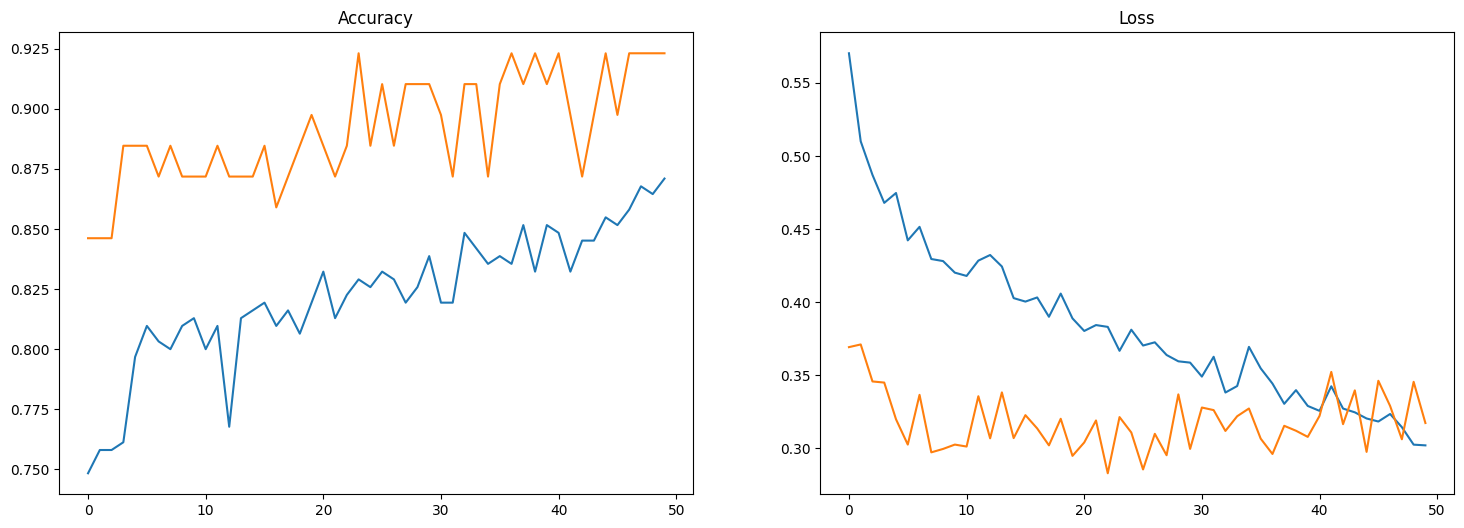


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.93      0.98      0.96        66

    accuracy                           0.92        78
   macro avg       0.90      0.78      0.83        78
weighted avg       0.92      0.92      0.92        78



In [ ]:
# Define the RNN model
model = Sequential([
     tf.keras.layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
        # More layers and more units:
        SimpleRNN(128, activation='relu', return_sequences=True),  # Increased units
        SimpleRNN(64, activation='relu', return_sequences=True),  # Added another layer
        SimpleRNN(32, activation='relu'),
        Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_rnn=model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'RNN Test Accuracy: {accuracy:.2f}')

# Predict on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Threshold at 0.5

# Accuracy and Loss curves
result=pd.DataFrame(history_rnn.history)
fig, ax=plt.subplots(nrows=1, ncols=2,figsize=(18,6))
ax=ax.flatten()
ax[0].plot(result[['accuracy','val_accuracy']])
ax[0].set_title("Accuracy")
ax[1].plot(result[['loss','val_loss']])
ax[1].set_title("Loss")

plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# Display sample predictions
print("First 5 Predictions:", y_pred[:5].flatten())
print("First 5 Actual Values:", y_test[:5].values)

First 5 Predictions: [1 1 1 1 0]
First 5 Actual Values: [0 1 1 1 0]


**Model 3: RNN+LSTM Hybrid Model**

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.7152 - loss: 0.6765 - val_accuracy: 0.8462 - val_loss: 0.5642
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7323 - loss: 0.5621 - val_accuracy: 0.8462 - val_loss: 0.3956
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7911 - loss: 0.4821 - val_accuracy: 0.8462 - val_loss: 0.3999
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7566 - loss: 0.5295 - val_accuracy: 0.8462 - val_loss: 0.3968
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7902 - loss: 0.4933 - val_accuracy: 0.8462 - val_loss: 0.3722
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7395 - loss: 0.5226 - val_accuracy: 0.8462 - val_loss: 0.3784
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7625 - loss: 0.5107 - val_accuracy: 0.8462 - val_loss: 0.3588
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7621 - loss: 0.4996 - val_accuracy: 0.8462 - val_loss: 0.

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step


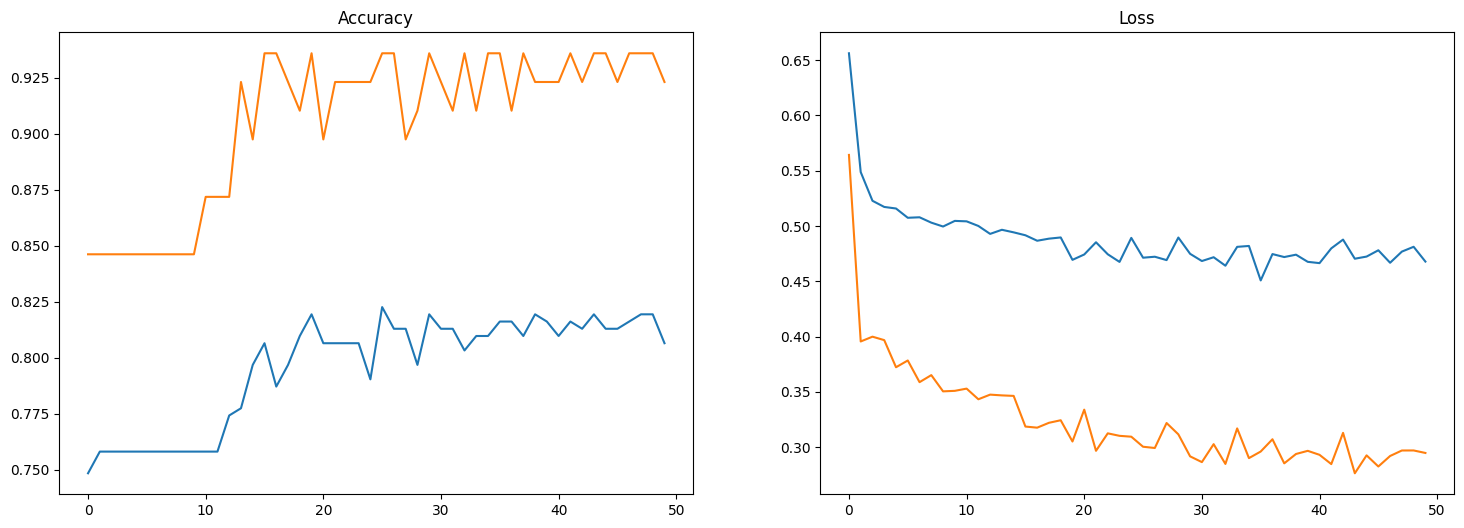


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.93      0.98      0.96        66

    accuracy                           0.92        78
   macro avg       0.90      0.78      0.83        78
weighted avg       0.92      0.92      0.92        78



In [ ]:
# Reshape the input data -> make it compatible with LSTM
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the RNN model with LSTM layers
model_rnn = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train_rnn.shape[1], 1)),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(64, return_sequences=False),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the RNN model
history_lstm = model_rnn.fit(X_train_rnn, y_train, epochs=50, validation_data=(X_test_rnn, y_test), batch_size=16)

# Evaluate the model
loss, accuracy_rnn = model_rnn.evaluate(X_test_rnn, y_test)
print(f'RNN with LSTM Accuracy: {accuracy_rnn*100:.2f}%')

# Predict on test data
y_pred = (model_rnn.predict(X_test) > 0.5).astype("int32")  # Threshold at 0.5

# Accuracy and Loss curves
result=pd.DataFrame(history_lstm.history)
fig, ax=plt.subplots(nrows=1, ncols=2,figsize=(18,6))
ax=ax.flatten()
ax[0].plot(result[['accuracy','val_accuracy']])
ax[0].set_title("Accuracy")
ax[1].plot(result[['loss','val_loss']])
ax[1].set_title("Loss")

plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# Display sample predictions
print("First 5 Predictions:", y_pred[:5].flatten())
print("First 5 Actual Values:", y_test[:5].values)


First 5 Predictions: [1 1 1 1 0]
First 5 Actual Values: [0 1 1 1 0]
